# Vi Ly
# Exam 2 
# Problem 3: Programming in Julia

## a) Using the house-votes84.data csv file, construct of the data matrix  ${A_0}$, centered-data matrix A, and sample covariance matrix S$.

In [90]:
using LinearAlgebra
using CSV
using Plots
theme(:dark)

In [91]:
m, n = 434, 17;

### Reading in the data from our table

In [92]:
data = CSV.read("house-votes-84.data")

,republican,n,y,n_1,y_1,y_2,y_3,n_2,n_3,n_4,y_4,?,y_5,y_6,y_7,n_5,y_8
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


### Replacing our character entries with integer entries 

In [110]:
A_0 = zeros(m, n-1)
for i in 1:434
    for j in 2:17
        if data[i,j] == "y"
            A_0[i,j-1] = 1

        elseif data[i,j] == "n"
            A_0[i,j-1] = 0
        
        elseif data[i,j] == "?"
            A_0[i,j-1] = -1
        end
            
    end
end
A_0 = A_0'

16×434 Adjoint{Float64,Array{Float64,2}}:
  0.0  -1.0   0.0   1.0  0.0   0.0   0.0  …   1.0  0.0  0.0   0.0   0.0   0.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0      0.0  0.0  0.0  -1.0   0.0   1.0
  0.0   1.0   1.0   1.0  1.0   0.0   0.0      1.0  1.0  1.0   0.0   0.0   0.0
  1.0  -1.0   0.0   0.0  0.0   1.0   1.0      0.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0  -1.0   1.0  1.0   1.0   1.0     -1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0  …   0.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   1.0
  0.0   1.0   1.0   1.0  0.0   0.0   0.0  …   0.0  0.0  0.0   1.0   0.0   0.0
  1.0   0.0   0.0  -1.0  0.0   0.0   0.0      1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.

### Splitting our ${A_0}$ data into training and testing for future analysis.

In [107]:
training = A_0[:,1:350]
testing = A_0[:,351:434];

### Centered-data matrix A

In [109]:
A = copy(training)
for i = 1:size(A)[1]
    # Calculate the mean of the i-th row
    μ = sum(A[i,:]) / size(A)[2]
    
    # Subtract the mean from each entry in the i-th row
    for j = 1:size(A)[2]
        A[i,j] -= μ
    end
end
A

16×350 Array{Float64,2}:
 -0.4       -1.4       -0.4       …   0.6       -0.4       -0.4     
  0.705714   0.705714   0.705714     -0.294286   0.705714   0.705714
 -0.565714   0.434286   0.434286      0.434286   0.434286  -0.565714
  0.628571  -1.37143   -0.371429     -0.371429   0.628571  -0.371429
  0.562857   0.562857  -1.43714      -0.437143   0.562857  -0.437143
  0.44       0.44       0.44      …  -0.56       0.44       0.44    
 -0.551429  -0.551429  -0.551429      0.448571   0.448571   0.448571
 -0.528571  -0.528571  -0.528571      0.471429   0.471429  -0.528571
 -0.442857  -0.442857  -0.442857      0.557143   0.557143   0.557143
 -0.48      -0.48      -0.48          0.52      -0.48      -0.48    
 -0.277143   0.722857   0.722857  …  -0.277143  -0.277143   0.722857
  0.685714  -0.314286  -0.314286      0.685714   0.685714  -0.314286
  0.6        0.6        0.6          -0.4        0.6       -0.4     
  0.477143   0.477143  -0.522857     -0.522857   0.477143  -0.522857
 -0.35714

### Covariance matrix S.

In [96]:
S = A*A'/(433) # n-1

16×16 Array{Float64,2}:
  0.230947      0.0133949    0.0942263   …   0.0669746  -0.000461894
  0.0133949     0.361867     0.0132366      -0.0110525   0.0146222  
  0.0942263     0.0132366    0.235539        0.116133    0.00366876 
 -0.0577367     0.0317387   -0.128274       -0.0864401   0.021841   
 -0.0628176     0.04613     -0.128301       -0.0938634   0.0232003  
 -0.0702079     0.04        -0.0851732   …  -0.073903    0.0122864  
  0.0803695    -0.0295546    0.128908        0.106401    0.0540812  
  0.0900693    -0.0310459    0.155526        0.10838     0.021577   
  0.0508083    -0.0337512    0.109271        0.0892445   0.0584626  
 -0.0143187    -0.0056351    0.00683603      0.0184758   0.0728868  
  0.030485      0.0818806    0.0580271   …   0.0654899   0.0474035  
 -0.0600462     0.0199274   -0.113692       -0.0768723   0.0271857  
 -0.0623557     0.0665127   -0.0974596      -0.073903    0.0341801  
 -0.0558891     0.00495546  -0.114378       -0.0839657   0.0555988  
  0.066974

### First, I compute the SVD 

In [97]:
U, Σ, V = svd(S)

SVD{Float64,Float64,Array{Float64,2}}([-0.175435 0.032286 … 0.0279866 0.0043953; 0.0731298 0.0991565 … 0.0487089 -0.00980677; … ; -0.240416 0.131648 … -0.0206129 -0.00541317; 0.00753772 0.886152 … -0.0271047 0.0158158], [1.49939, 0.664018, 0.427776, 0.307325, 0.2429, 0.209291, 0.188573, 0.171946, 0.159385, 0.121672, 0.118065, 0.113028, 0.0986081, 0.0798049, 0.0661573, 0.0416757], [-0.175435 0.0731298 … -0.240416 0.00753772; 0.032286 0.0991565 … 0.131648 0.886152; … ; 0.0279866 0.0487089 … -0.0206129 -0.0271047; 0.0043953 -0.00980677 … -0.00541317 0.0158158])

## b) Visualize the singular values.

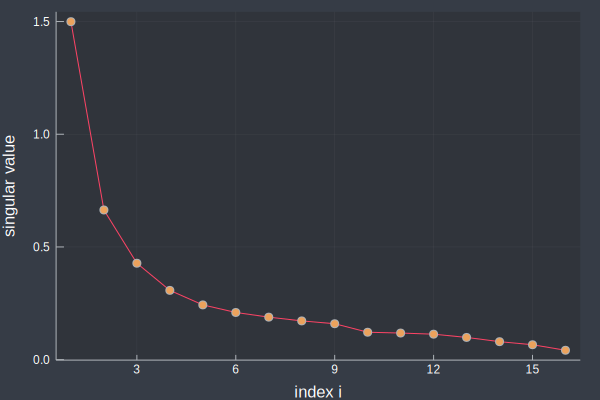

In [98]:
plot(Σ)
scatter!(Σ, legend = false, xaxis = "index i", yaxis = "singular value")

#### From the plot, we can see that most of variance can be explained by the first three singular values. 
#### We will use this for our further examination.

## c) Visualize the data projected onto the principal components.

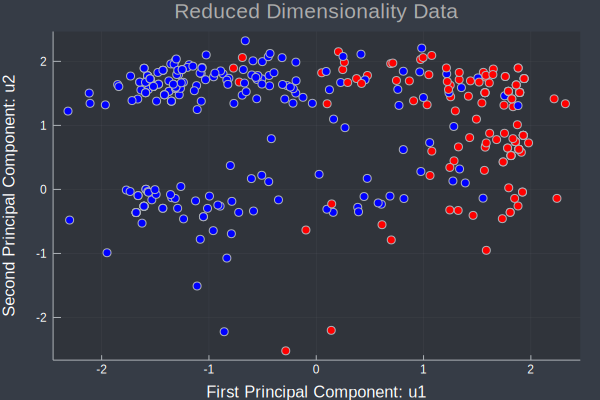

In [99]:
U_reduced = U[:, 1:2]
scatter(xaxis = "First Principal Component: u1",
        yaxis = "Second Principal Component: u2",
        legend = false,
        title = "Reduced Dimensionality Data")

    for i = 1:size(training)[2]
        p = U_reduced'*training[:, i]
        party = data[i, 1] == "republican" ? "red" : "blue"
        scatter!([(p[1], p[2])], color = party)
    end

scatter!()


In [100]:
training_data = U_reduced'*training
training_data = [(training_data[1, i], training_data[2,i]) for i = 1:350];

In [101]:
function euclidean_distance(p1, p2)
    return sqrt( (p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)
end

function Knn(k, training_data, data_instance, party)
    point = U_reduced' * data_instance
    point = (point[1], point[2])
    neighbors = []
    for i = 1:length(training_data)
        p = training_data[i]
        dist = euclidean_distance(point, p)
        push!(neighbors, (data[i, 1], p, dist) )
    end
    sort!(neighbors, by = x -> x[3])
    return neighbors[1:k]
end

Knn (generic function with 1 method)

## d) Implement the K-nearest neighbors algorithm and make a prediction on an out of sample data instance.

In [102]:
test = Knn(10, training_data, A_0[:,400], data[400,1])

10-element Array{Any,1}:
 ("republican", (0.6990487199536307, -0.7888728814286325), 0.40345282501546964)
 ("republican", (1.5850948224284005, -0.9511286025798071), 0.5145795883529058) 
 ("republican", (0.612859444304499, -0.5510280517107154), 0.6047112046599695)  
 ("republican", (1.2446340061382393, -0.32089920963868945), 0.6491389257149274)
 ("republican", (1.3225699361071472, -0.3285892263485162), 0.6671080068450941) 
 ("republican", (1.4616476778800138, -0.4052873121243644), 0.6675436010844656) 
 ("republican", (1.7341662402814584, -0.4569450285378249), 0.8245168212706423) 
 ("democrat", (0.8172315118363082, -0.14242298345828686), 0.8428007003881546)  
 ("democrat", (0.6069675863136836, -0.2308271597330016), 0.8524888708362005)   
 ("democrat", (0.576945478979682, -0.21070996306453305), 0.8858120102312815)   

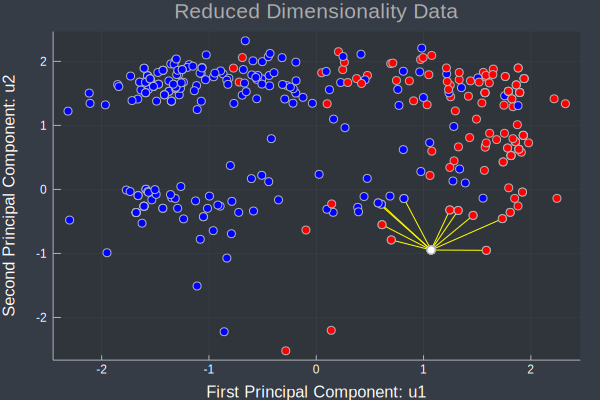

In [103]:
test_point = U_reduced' * A_0[:, 400]
test_point = (test_point[1], test_point[2])
for i = 1:10
    plot!([test_point, test[i][2]], color = "yellow")
end

for i = 1:10
    scatter!([test_point, test[i][2]], color = test[i][1] == "republican" ? "red" : "blue")
end

scatter!([test_point], color = "white")

## Put all the previous part together in a function to predict a given point based on k-nearest neighbors

In [104]:
function KNN_prediction(k, i)
    point = U_reduced'*A_0[:, i]
    test_point = (point[1], point[2])
    training_data = U_reduced'*A_0
    training_data = [(training_data[1, j], training_data[2,j])
                        for j = 1:size(training_data)[2]]
    neighbors = []
    for j = 1:length(training_data)
        p = training_data[j]
        dist = euclidean_distance(point, p)
        push!(neighbors, (data[j, 1], p, dist))
    end
    sort!(neighbors, by = x -> x[3])
    neighbors = neighbors[1:k]
    #return(neighbors)

    scatter(xaxis = "First Principal Component: u1",
        yaxis = "Second Principal Component: u2",
        legend = false,
        title = "Reduced Dimensionality Data")

    for i = 1:size(training)[2]
        p = U_reduced'*training[:, i]
        party = data[i, 1] == "republican" ? "red" : "blue"
        scatter!([(p[1], p[2])], color = party)
    end

    scatter!()
    for i = 1:k
        plot!([test_point, neighbors[i,1][2]], color = "yellow")
    end

    for i = 1:k
        scatter!([test_point, test[i][2]], color = neighbors[i][1] == "republican" ? "red" : "blue")
    end
    scatter!([test_point], color = "white")
    
    D = 0
    R = 0
    for i = 1:length(neighbors)
        if neighbors[i, 1][1] == "republican"
            R+= 1    
        else 
            D+=1
        end
    end
    party = R > D ? "republican" : "democrat"
    println("Congress member ",i, " is predicted to be a member of ", party)

    scatter!( [point], label = party, color = "white" )

end
    
        

KNN_prediction (generic function with 1 method)

## Testing the function a a few samples

Congress member 11 is predicted to be a member of republican


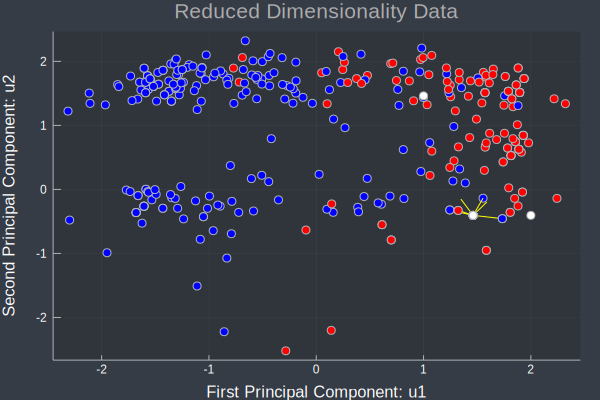

In [105]:
KNN_prediction(7, 11)

Congress member 22 is predicted to be a member of democrat


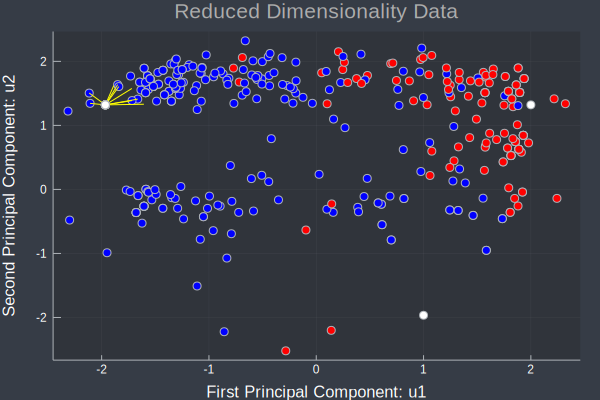

In [108]:
KNN_prediction(10, 22)